In [1]:
# Carregando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Alterando a o diretório de trabalho e carregando a base de dados

import os
os.chdir('C:\\Users\\ggonc\\OneDrive\\Documentos\\GitHub\\Bases de dados')

wdo = pd.read_csv('WDOFUT_25.03.22.csv', sep = ';')

In [3]:
# Analisando o tamanho da base
wdo.shape

(4168, 5)

In [4]:
# Analisando os primeiros valores da base
wdo.head()

,Data,Abertura,Máxima,Mínima,Fechamento
0,2005-05-17,2487.0,2502.0,2487.0,2494.0
1,2005-05-18,2484.0,2484.0,2469.0,2470.0
2,2005-05-19,2455.0,2458.0,2450.0,2455.0
3,2005-05-20,2460.0,2463.0,2451.0,2451.0
4,2005-05-23,2443.0,2443.0,2432.0,2433.0


In [5]:
# Tratando e ajustando a data

# Convertendo a coluna de datas para formato de data
wdo['Data'] = pd.to_datetime(wdo['Data']).dt.normalize()

# Configurando a coluna como índice
wdo = wdo.set_index('Data')

In [6]:
# Confirmando a alterações anteriores
wdo.head()

,Abertura,Máxima,Mínima,Fechamento
Data,,,,
2005-05-17,2487.0,2502.0,2487.0,2494.0
2005-05-18,2484.0,2484.0,2469.0,2470.0
2005-05-19,2455.0,2458.0,2450.0,2455.0
2005-05-20,2460.0,2463.0,2451.0,2451.0
2005-05-23,2443.0,2443.0,2432.0,2433.0


In [7]:
# Analisando as estatística de cada variavel
wdo.describe()

,Abertura,Máxima,Mínima,Fechamento
count,4168.000000,4168.000000,4168.000000,4168.000000
mean,2897.309702,2918.035461,2877.735629,2897.638772
std,1192.600310,1204.171832,1181.108273,1192.896612
min,1534.500000,1542.000000,1530.000000,1541.500000
25%,1963.000000,1974.750000,1953.000000,1964.000000
50%,2340.500000,2356.500000,2322.000000,2337.500000
75%,3720.250000,3745.500000,3696.875000,3723.750000
max,5927.500000,5977.500000,5823.500000,5894.500000


In [8]:
# Construção dos alvos

periodos = 1 # Quantos dias para frente quero prever?

# Definindo o alvo que é o retorno 
wdo['Retorno'] = wdo['Fechamento'].pct_change(periodos) # metodo pct_change calcula retorno para "x" periodos
wdo['Alvo'] = wdo['Retorno'].shift(-periodos) # método shift desloca a célula

# Variação em pontos para posterior análise do retorno
wdo['Pontos'] = (wdo['Fechamento'] - wdo['Fechamento'].shift(1))
wdo['Pontos'] = wdo['Pontos'].shift(-periodos)

# Criação do alvo categorico
wdo['Alvo_cat'] = np.where(wdo['Alvo'] > 0, 'Alta', 'Baixa')

In [9]:
# Analisando a base novamente
wdo.head()

,Abertura,Máxima,Mínima,Fechamento,Retorno,Alvo,Pontos,Alvo_cat
Data,,,,,,,,
2005-05-17,2487.0,2502.0,2487.0,2494.0,NaN,-0.009623,-24.0,Baixa
2005-05-18,2484.0,2484.0,2469.0,2470.0,-0.009623,-0.006073,-15.0,Baixa
2005-05-19,2455.0,2458.0,2450.0,2455.0,-0.006073,-0.001629,-4.0,Baixa
2005-05-20,2460.0,2463.0,2451.0,2451.0,-0.001629,-0.007344,-18.0,Baixa
2005-05-23,2443.0,2443.0,2432.0,2433.0,-0.007344,-0.000411,-1.0,Baixa


In [10]:
wdo.tail()

,Abertura,Máxima,Mínima,Fechamento,Retorno,Alvo,Pontos,Alvo_cat
Data,,,,,,,,
2022-03-21,5046.5,5048.0,4947.0,4955.0,-0.017645,-0.005853,-29.0,Baixa
2022-03-22,4950.0,4965.5,4919.0,4926.0,-0.005853,-0.017255,-85.0,Baixa
2022-03-23,4931.5,4933.5,4832.0,4841.0,-0.017255,-0.000516,-2.5,Baixa
2022-03-24,4844.5,4869.5,4775.0,4838.5,-0.000516,-0.017981,-87.0,Baixa
2022-03-25,4831.0,4833.0,4738.0,4751.5,-0.017981,NaN,NaN,Baixa


In [11]:
# Analisando a proporção dos alvos categoricos

wdo['Alvo_cat'].value_counts(normalize = True)*100

Baixa    50.743762
Alta     49.256238
Name: Alvo_cat, dtype: float64

In [12]:
# Construção das variaveis

# Desvio Padrão de 5 dias
wdo['std5'] = wdo['Fechamento'].rolling(5).std()

# Desvio Padrão de 10 dias
wdo['std10'] = wdo['Fechamento'].rolling(10).std()

# Proporção do corpo do candle em relação ao range do dia
wdo['prop'] = (wdo['Fechamento']-wdo['Abertura'])/(wdo['Máxima']-wdo['Mínima'])

# Direção do dia atual
wdo['dir_D'] = np.where(wdo['Fechamento'] > wdo['Abertura'], '1', '0')

# Direção D-1
wdo['dir_D-1'] = wdo['dir_D'].shift(1)

# Direção D-2
wdo['dir_D-2'] = wdo['dir_D'].shift(2)

# Direção D-3
wdo['dir_D-3'] = wdo['dir_D'].shift(3)

In [13]:
# Analisando a criação das variaveis

wdo.head(15)

,Abertura,Máxima,Mínima,Fechamento,Retorno,Alvo,Pontos,Alvo_cat,std5,std10,prop,dir_D,dir_D-1,dir_D-2,dir_D-3
Data,,,,,,,,,,,,,,,
2005-05-17,2487.0,2502.0,2487.0,2494.0,NaN,-0.009623,-24.0,Baixa,NaN,NaN,0.466667,1,NaN,NaN,NaN
2005-05-18,2484.0,2484.0,2469.0,2470.0,-0.009623,-0.006073,-15.0,Baixa,NaN,NaN,-0.933333,0,1,NaN,NaN
2005-05-19,2455.0,2458.0,2450.0,2455.0,-0.006073,-0.001629,-4.0,Baixa,NaN,NaN,0.000000,0,0,1,NaN
2005-05-20,2460.0,2463.0,2451.0,2451.0,-0.001629,-0.007344,-18.0,Baixa,NaN,NaN,-0.750000,0,0,0,1
2005-05-23,2443.0,2443.0,2432.0,2433.0,-0.007344,-0.000411,-1.0,Baixa,22.853884,NaN,-0.909091,0,0,0,0
2005-05-24,2435.0,2442.0,2431.0,2432.0,-0.000411,-0.008224,-20.0,Baixa,15.990622,NaN,-0.272727,0,0,0,0
2005-05-25,2420.0,2421.0,2409.0,2412.0,-0.008224,-0.009536,-23.0,Baixa,17.213367,NaN,-0.666667,0,0,0,0
2005-05-27,2399.0,2399.0,2389.0,2389.0,-0.009536,-0.008372,-20.0,Baixa,23.670657,NaN,-1.000000,0,0,0,0
2005-05-30,2376.0,2376.0,2369.0,2369.0,-0.008372,0.030815,73.0,Alta,27.811868,NaN,-1.000000,0,0,0,0


In [14]:
# Removendo os valores NaN dos dados iniciais e finais

wdo1 = wdo.dropna(axis = 0) # axis = 0 para eliminar a linha

In [15]:
wdo1.head()

,Abertura,Máxima,Mínima,Fechamento,Retorno,Alvo,Pontos,Alvo_cat,std5,std10,prop,dir_D,dir_D-1,dir_D-2,dir_D-3
Data,,,,,,,,,,,,,,,
2005-05-31,2407.0,2454.0,2407.0,2442.0,0.030815,0.015561,38.0,Alta,30.111460,37.154482,0.744681,1,0,0,0
2005-06-01,2453.0,2480.0,2452.0,2480.0,0.015561,-0.016129,-40.0,Baixa,43.866844,34.864978,0.964286,1,1,0,0
2005-06-02,2465.0,2465.0,2440.0,2440.0,-0.016129,0.004098,10.0,Alta,44.626225,32.571460,-1.000000,0,1,1,0
2005-06-03,2424.0,2458.0,2419.0,2450.0,0.004098,0.012245,30.0,Alta,40.843604,32.186263,0.666667,1,0,1,1
2005-06-06,2480.0,2505.0,2474.0,2480.0,0.012245,0.002016,5.0,Alta,20.069878,35.449651,0.000000,0,1,0,1


In [16]:
wdo1.tail()

,Abertura,Máxima,Mínima,Fechamento,Retorno,Alvo,Pontos,Alvo_cat,std5,std10,prop,dir_D,dir_D-1,dir_D-2,dir_D-3
Data,,,,,,,,,,,,,,,
2022-03-18,5069.0,5094.5,5012.0,5044.0,-0.003261,-0.017645,-89.0,Baixa,60.274995,51.556442,-0.303030,0,0,0,1
2022-03-21,5046.5,5048.0,4947.0,4955.0,-0.017645,-0.005853,-29.0,Baixa,84.391202,64.546194,-0.905941,0,0,0,0
2022-03-22,4950.0,4965.5,4919.0,4926.0,-0.005853,-0.017255,-85.0,Baixa,73.123697,80.013471,-0.516129,0,0,0,0
2022-03-23,4931.5,4933.5,4832.0,4841.0,-0.017255,-0.000516,-2.5,Baixa,89.941370,106.337369,-0.891626,0,0,0,0
2022-03-24,4844.5,4869.5,4775.0,4838.5,-0.000516,-0.017981,-87.0,Baixa,85.901397,124.100945,-0.063492,0,0,0,0


In [24]:
# Preparação da base de treinamento e teste

# A base vai de 31-05-2005 a 24-03-2022

# Vamos treinar o modelo de 2005 a 2013
start_train = '2005-05-31'
end_train = '2013-12-31'

# Vamos testar o modelo de 2014 a 2022
start_test = '2014-01-01'
end_test = '2022-03-24'

# Separando em base de teste e treinamento

wdo_train1 = wdo1[start_train : end_train]
wdo_test1 = wdo1[start_test : end_test]

In [25]:
# Comparando o tamanho das bases
print(wdo_train1.shape)
print(wdo_test1.shape)

(2123, 15)
(2035, 15)


In [26]:
# Colunas que contêm as variáveis
wdo1.columns[8:wdo1.shape[1]]

Index(['std5', 'std10', 'prop', 'dir_D', 'dir_D-1', 'dir_D-2', 'dir_D-3'], dtype='object')

In [27]:
# Separando os dados com as variaveis em x e o alvo em y

x_train1 = wdo_train1.iloc[:, 8:wdo1.shape[1]]
y_train1 = wdo_train1['Alvo_cat']

x_test1 = wdo_test1.iloc[:, 8:wdo1.shape[1]]
y_test1 = wdo_test1['Alvo_cat']

In [28]:
# Treinamento da arvore de decisão para tarefa de classficação

# Importando o método da sklearn
from sklearn.tree import DecisionTreeClassifier

# Aplicando em uma variável
arvore1 = DecisionTreeClassifier()

# Treinando o modelo
arvore1.fit(x_train1, y_train1) # essa é a linha que treina o modelo!

DecisionTreeClassifier()

In [29]:
# Realizando a predição na base de teste
y_pred_test = arvore1.predict(x_test1)

In [30]:
# Avaliando os resultados na base de teste através das estaticas da classificação e de uma matriz de confusão

# Importando os métodos da sklearn
from sklearn.metrics import classification_report, confusion_matrix

# Imprimindo os dados
print(confusion_matrix(y_test1, y_pred_test))
print()
print('---------------------------')
print()
print(classification_report(y_test1, y_pred_test))

[[531 505]
 [491 508]]

---------------------------

              precision    recall  f1-score   support

        Alta       0.52      0.51      0.52      1036
       Baixa       0.50      0.51      0.50       999

    accuracy                           0.51      2035
   macro avg       0.51      0.51      0.51      2035
weighted avg       0.51      0.51      0.51      2035



In [31]:
# Analisando a acurácia do modelo

# Importando a sklearn.metrics
import sklearn.metrics as metrics

print('Acuracia: ', round(metrics.accuracy_score(y_test1, y_pred_test)*100, 3))

Acuracia:  51.057


In [ ]:
# Visualizando a árvore de decisão

# Visualização com ajuda do GraphViz
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
# Improtando as bibliotecas
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Aplicando o método em uma variável
dot_data = StringIO()

# Criando a imagem da árvore e salvando-a
export_graphviz(arvore1
               , out_file = dot_data
               , filled = True
               , rounded = True
               , special_characters = True
               , feature_names = wdo1.columns[8:wdo1.shape[1]]
               , class_names=['Baixa','Alta'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('arvore_wdo.png')
Image(graph.create_png())

In [32]:
# Calculando a performance 

# Criando uma coluna com os valores preditos
wdo_test1.loc[:, 'Previsto'] = y_pred_test

# Convertendo para string para conseguir classificar posteriormente
wdo_test1['Previsto'].astype(str)

C:\Users\ggonc\anaconda3\envs\R\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Data
2014-01-02     Alta
2014-01-03     Alta
2014-01-06    Baixa
2014-01-07    Baixa
2014-01-08     Alta
              ...  
2022-03-18    Baixa
2022-03-21     Alta
2022-03-22     Alta
2022-03-23     Alta
2022-03-24    Baixa
Name: Previsto, Length: 2035, dtype: object

In [33]:
# Ajustando o retorno em pontos com o resultado do modelo

wdo_test1.loc[: , "Ret_Pontos"] = np.where(wdo_test1.loc[: , 'Previsto'] == "Alta" , wdo_test1.loc[: , 'Pontos'], '0')
wdo_test1.loc[: , "Ret_Pontos"] = np.where(wdo_test1.loc[: , 'Previsto'] == "Baixa" , -1*wdo_test1.loc[: , 'Pontos'], wdo_test1.loc[: , "Ret_Pontos"])

C:\Users\ggonc\anaconda3\envs\R\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [34]:
# Convertendo para float para conseguir somar

wdo_test1.loc[:, 'Ret_Pontos'] = wdo_test1['Ret_Pontos'].astype(float)

In [35]:
# Realizando a soma acumulada dos retorno em pontos
wdo_test1.loc[:, 'Ret_Pontos_Acum'] = wdo_test1['Ret_Pontos'].cumsum()

In [36]:
# Analisando o resultado final do modelo em pontos na base de teste

wdo_test1.loc[:, "Ret_Pontos_Acum"].tail()

Data
2022-03-18    481.0
2022-03-21    452.0
2022-03-22    367.0
2022-03-23    364.5
2022-03-24    451.5
Name: Ret_Pontos_Acum, dtype: float64

In [37]:
# Cada ponto no WDO equivale à 10 reias, assim o retorno de 2014 à 2022 seria de R$7195,00

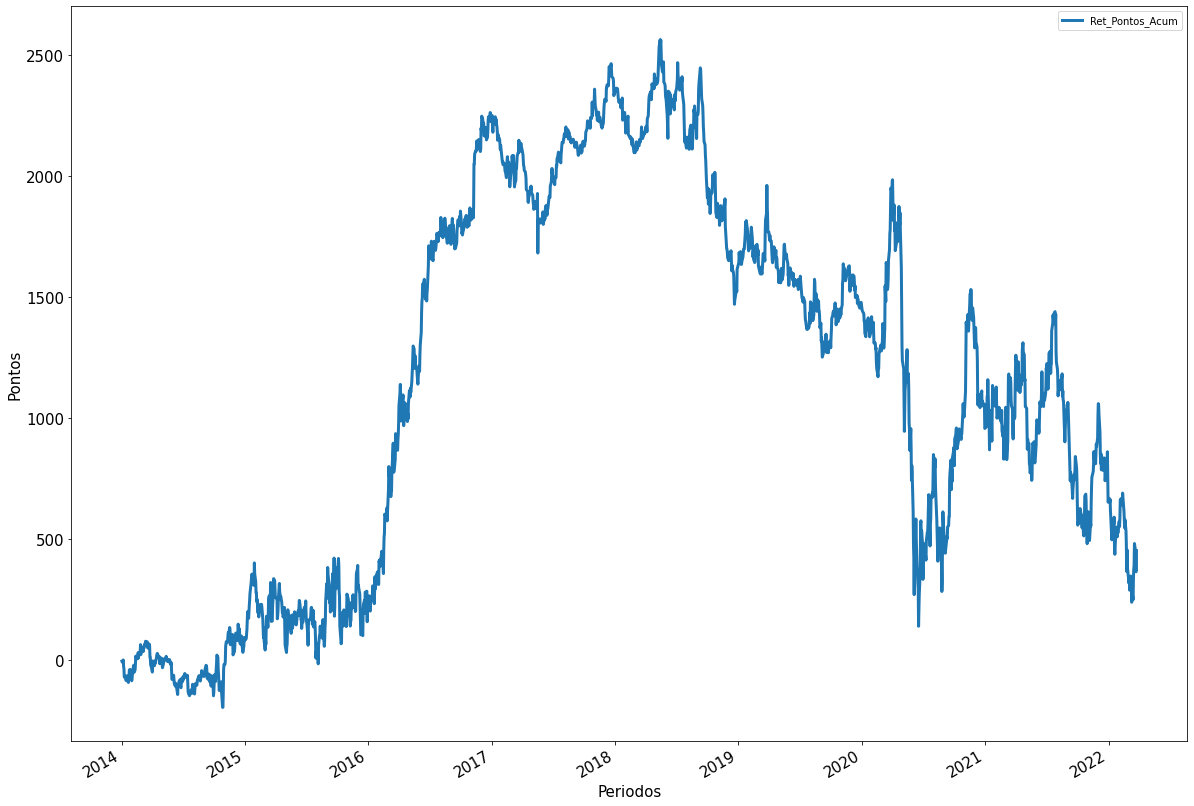

In [38]:
# Plotando o gráfico do retorno

wdo_test1['Ret_Pontos_Acum'].plot(figsize = (20,15)
                                    , linewidth = 3
                                    , fontsize = 15)

plt.xlabel('Periodos'
          , fontsize = 15)
plt.ylabel('Pontos'
          , fontsize = 15)
plt.legend();

In [39]:
# Apesar do resultado positivo, o modelo está negativo desde 2018

In [40]:
# Analisando a estabilidade em relação à base de treinamento

# Realizando a predição na base de treinamento
y_pred_train = arvore1.predict(x_train1)

# Imprimindo os dados
print("Matriz de confusão base de teste:")
print(confusion_matrix(y_test1, y_pred_test))
print()
print("Matriz de confusão base de treinamento:")
print(confusion_matrix(y_train1, y_pred_train))
print()
print('---------------------------')
print()
print("Estatísticas para base de teste:")
print(classification_report(y_test1, y_pred_test))
print()
print("Estatísticas para base de treinamento:")
print(classification_report(y_train1, y_pred_train))

Matriz de confusão base de teste:
[[531 505]
 [491 508]]

Matriz de confusão base de treinamento:
[[1016    0]
 [   0 1107]]

---------------------------

Estatísticas para base de teste:
              precision    recall  f1-score   support

        Alta       0.52      0.51      0.52      1036
       Baixa       0.50      0.51      0.50       999

    accuracy                           0.51      2035
   macro avg       0.51      0.51      0.51      2035
weighted avg       0.51      0.51      0.51      2035


Estatísticas para base de treinamento:
              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00      1016
       Baixa       1.00      1.00      1.00      1107

    accuracy                           1.00      2123
   macro avg       1.00      1.00      1.00      2123
weighted avg       1.00      1.00      1.00      2123



In [41]:
# A ÁRVORE ESTÁ COM OVERFITTING!!!

In [42]:
# Vamos refazer o modelo adicionando alguns parâmetros

In [43]:
# Treinando o modelo novamente

# Adicionando o gini como critério de avaliação e limitando a profundidade, o número máixmo de folhas
# , o número minimo de registros por folha e o número mínimo de quebras por nó
arvore2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 15
                                    , min_samples_leaf = 50
                                    , min_samples_split = 5
                                    , max_leaf_nodes = 15)
arvore2.fit(x_train1, y_train1)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=15, min_samples_leaf=50,
                       min_samples_split=5)

In [44]:
# Realizando a previsão para a base de teste

y_pred_test1 = arvore2.predict(x_test1)

In [45]:
# Avaliando novamente os resultados

print(confusion_matrix(y_test1, y_pred_test1))
print()
print('---------------------------')
print()
print(classification_report(y_test1, y_pred_test1))

[[485 551]
 [428 571]]

---------------------------

              precision    recall  f1-score   support

        Alta       0.53      0.47      0.50      1036
       Baixa       0.51      0.57      0.54       999

    accuracy                           0.52      2035
   macro avg       0.52      0.52      0.52      2035
weighted avg       0.52      0.52      0.52      2035



In [46]:
# Analisando a Acurácia do novo modelo

print('Acuracia: ', round(metrics.accuracy_score(y_test1, y_pred_test1)*100, 3))

Acuracia:  51.892


In [47]:
# A acurácia aumentou!

In [48]:
# Calculando a performance 

# Criando uma coluna com os valores preditos
wdo_test1.loc[:, 'Previsto2'] = y_pred_test1

# Convertendo para string para conseguir classificar posteriormente
wdo_test1['Previsto2'].astype(str)

C:\Users\ggonc\anaconda3\envs\R\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Data
2014-01-02    Baixa
2014-01-03    Baixa
2014-01-06    Baixa
2014-01-07    Baixa
2014-01-08    Baixa
              ...  
2022-03-18    Baixa
2022-03-21     Alta
2022-03-22     Alta
2022-03-23     Alta
2022-03-24     Alta
Name: Previsto2, Length: 2035, dtype: object

In [49]:
# Ajustando o retorno em pontos com o resultado do modelo

wdo_test1.loc[: , "Ret_Pontos2"] = np.where(wdo_test1.loc[: , 'Previsto2'] == "Alta" , wdo_test1.loc[: , 'Pontos'], '0')
wdo_test1.loc[: , "Ret_Pontos2"] = np.where(wdo_test1.loc[: , 'Previsto2'] == "Baixa" , -1*wdo_test1.loc[: , 'Pontos'], wdo_test1.loc[: , "Ret_Pontos2"])

C:\Users\ggonc\anaconda3\envs\R\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [50]:
# Convertendo para float para conseguir somar

wdo_test1.loc[:, 'Ret_Pontos2'] = wdo_test1['Ret_Pontos2'].astype(float)

In [51]:
# Realizando a soma acumulada dos retorno em pontos
wdo_test1.loc[:, 'Ret_Pontos_Acum2'] = wdo_test1['Ret_Pontos2'].cumsum()

In [52]:
# Analisando o resultado final do novo modelo em pontos na base de teste

wdo_test1.loc[:, "Ret_Pontos_Acum2"].tail()

Data
2022-03-18    3394.0
2022-03-21    3365.0
2022-03-22    3280.0
2022-03-23    3277.5
2022-03-24    3190.5
Name: Ret_Pontos_Acum2, dtype: float64

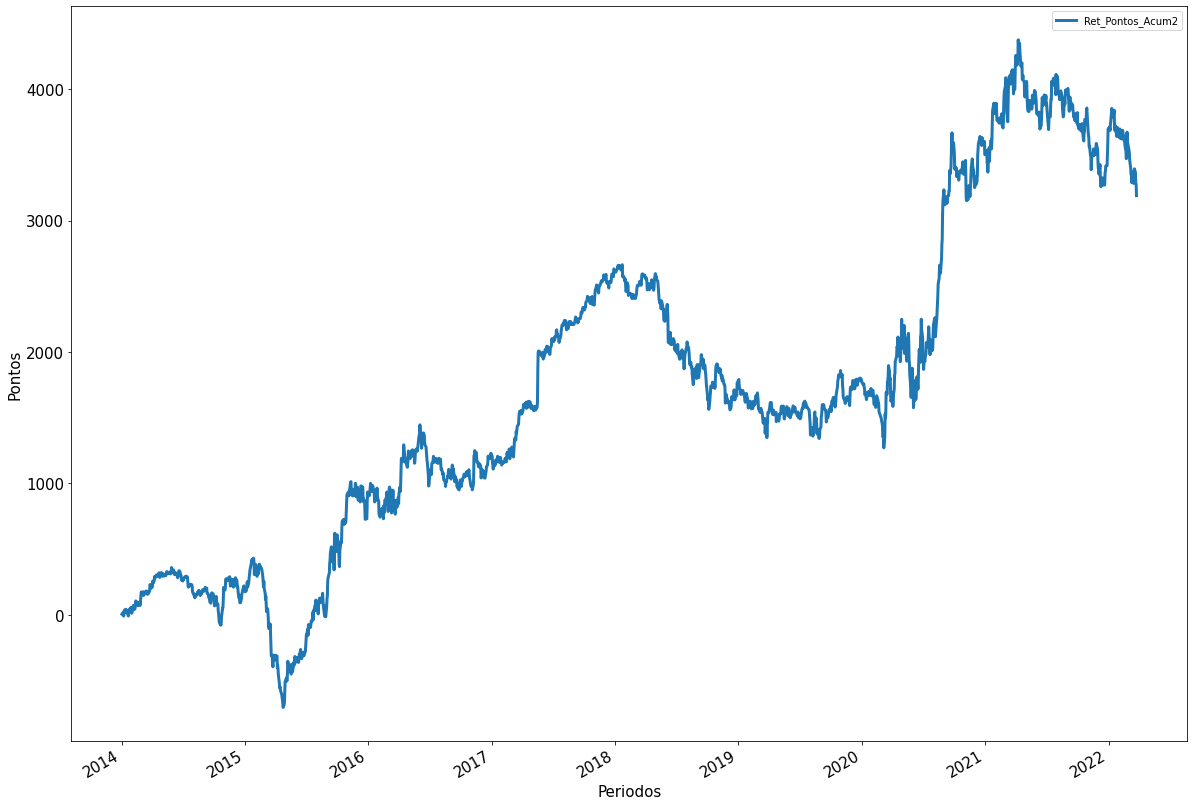

In [53]:
# Plotando o gráfico do retorno

wdo_test1['Ret_Pontos_Acum2'].plot(figsize = (20,15)
                                    , linewidth = 3
                                    , fontsize = 15)

plt.xlabel('Periodos'
          , fontsize = 15)
plt.ylabel('Pontos'
          , fontsize = 15)
plt.legend();

In [54]:
# De 2014 à 2022 o modelo teria gerado um retorno de R$31905,00
# O modelo ficou um longo período em drawdown, entre ínicio de 2018 e final de 2020

In [55]:
# Analisando a estabilidade em relação à base de treinamento

# Realizando a predição na base de treinamento
y_pred_train1 = arvore2.predict(x_train1)

# Imprimindo os dados
print("Matriz de confusão base de teste:")
print(confusion_matrix(y_test1, y_pred_test1))
print()
print("Matriz de confusão base de treinamento:")
print(confusion_matrix(y_train1, y_pred_train1))
print()
print('---------------------------')
print()
print("Estatísticas para base de teste:")
print(classification_report(y_test1, y_pred_test1))
print()
print("Estatísticas para base de treinamento:")
print(classification_report(y_train1, y_pred_train1))

Matriz de confusão base de teste:
[[485 551]
 [428 571]]

Matriz de confusão base de treinamento:
[[431 585]
 [306 801]]

---------------------------

Estatísticas para base de teste:
              precision    recall  f1-score   support

        Alta       0.53      0.47      0.50      1036
       Baixa       0.51      0.57      0.54       999

    accuracy                           0.52      2035
   macro avg       0.52      0.52      0.52      2035
weighted avg       0.52      0.52      0.52      2035


Estatísticas para base de treinamento:
              precision    recall  f1-score   support

        Alta       0.58      0.42      0.49      1016
       Baixa       0.58      0.72      0.64      1107

    accuracy                           0.58      2123
   macro avg       0.58      0.57      0.57      2123
weighted avg       0.58      0.58      0.57      2123



In [56]:
# O novo modelo está mais estável que o anterior se comparando os resultados das bases de treinamento e teste